<a href="https://colab.research.google.com/github/ahaque12/fiddler-infinite-corridor/blob/main/Fiddler_on_the_proof_infinite_corridor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

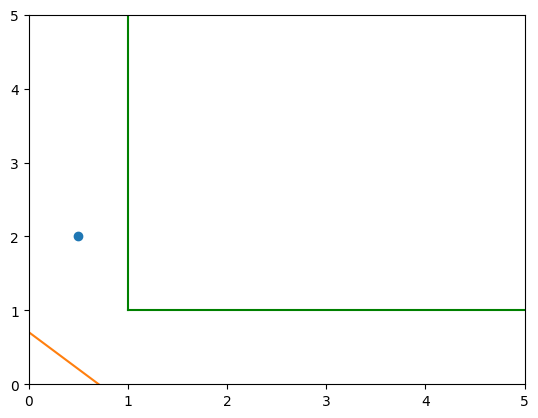

In [ ]:
# Plot one point at (.5, 2), a diagonal line from (1, 0) to (0, 1)
# Make sure the x and y axis are the same
MAX = 5
def base_plot(l=np.sqrt(2), rho=np.pi/4):
  fig, ax = plt.subplots()
  x, y = l * np.cos(rho), l * np.sin(rho)
  ax.set_xlim(0, MAX)
  ax.set_ylim(0, MAX)
  ax.plot([.5], [2], 'o')
  ax.plot([x, 0], [0, y])
  ax.plot([1, MAX], [1, 1], color='green')
  ax.plot([1, 1], [MAX, 1], color='green')
  return fig, ax

base_plot(l=1);

In [ ]:
from IPython.display import clear_output

def plot_line(ax, x1, x2, y1, y2, color='pink'):
  ax.plot([x1, x2], [y1, y2], linestyle="dashed", color=color)

def plot_angle(ax, theta, x1, y1, magnitude=1, project=True, color='pink'):
  """Plot from (.5, 2) at angle theta to intersection of
  line from (0,1) to (1, 0)
  """
  b = 1 if project else -1
  b*= magnitude
  x2, y2 = x1 + b*np.cos(theta), y1 + b*np.sin(theta)
  plot_line(ax, x1, x2, y1, y2, color=color)
  return x2, y2

def intersection(l, theta, rho=np.pi/4):
  #x = ((l / np.sqrt(2)) + np.tan(theta)*.5 - 2)/(1 + np.tan(theta))
  #y = -x + (l / np.sqrt(2))
  x = l - (((l-.5)*np.tan(theta) + 2) / (np.sin(rho) + np.tan(theta)))
  y = (l*np.sin(rho))+np.tan(-rho)*x #np.sin(rho) * (((L-.5)*np.tan(theta) + 2) / (np.sin(rho) + np.tan(theta)))
  return x, y

def mirror_angle(theta, rho=np.pi/4):
  """Return mirrored theta"""
  return np.pi - theta - 2*rho

def plot_scenario(l, theta, rho=np.pi/4, theta2=None):
  clear_output()
  x1, y1 = .5, 2
  fig, ax = base_plot(l=l, rho=rho)

  x2, y2 = intersection(l, theta, rho=rho)
  ax.plot([x2], [y2], 'o', color='green')
  plot_line(ax, x1, x2, y1, y2)
  theta_m = mirror_angle(theta, rho=rho)
  if theta2 is not None:
    x3, y3 = intersection(l, theta2, rho=rho)
    ax.plot([x3], [y3], 'o', color='green')
    plot_line(ax, x1, x3, y1, y3)
    theta2_m = mirror_angle(theta2, rho=rho)
    plot_angle(ax, theta2_m, x3, y3, magnitude=MAX)
    plot_angle(ax, (np.pi/2) - rho, x3, y3, color='blue', magnitude=np.sqrt(2))
  plot_angle(ax, (np.pi/2) - rho , x2, y2, color='blue', magnitude=np.sqrt(2))
  plot_angle(ax, theta_m, x2, y2, magnitude=MAX)
  plt.show()
  return fig, ax

Let $\theta$ represent the angle between the x-axis and the line intersecting $(\frac12, 2)$. Note that a mirror reflects light such that the angle of incidence is the same as the angle of reflection. So if $\psi$ is the new angle of the reflected ray $\psi = \frac{\pi}{2} - \theta$. To find where $L$ is at a minimum it is when the ray reflects from the edge of line $L$ to $(1,1)$.


\begin{align}
tan(\psi) &= \frac{1}{tan(\theta)} \\
y &= (x - \frac12)tan(\theta)+2 \\
y &= -x + \frac{L}{\sqrt(2)} \\
y &= \frac{1}{tan(\theta)}(x-1) + 1 \\
x &= 0
\end{align}


In [ ]:
# Use sympy to solve system of equations

import sympy as sp
x, y, theta = sp.symbols('x y theta')
eq1 = sp.Eq(y, (1/sp.tan(theta))*(x-1))
eq2 = sp.Eq(y, (x - .5)*sp.tan(theta) + 2)
eq3 = sp.Eq(y, -x + .5*(3 - sp.sqrt(3)))
result = sp.solve([eq1, eq2, eq3], (x, y, theta))
result

[(0.612004618869898, 0.0219699773456634, -1.51423240207545)]

0.8965754721680536 1.2199169159226388


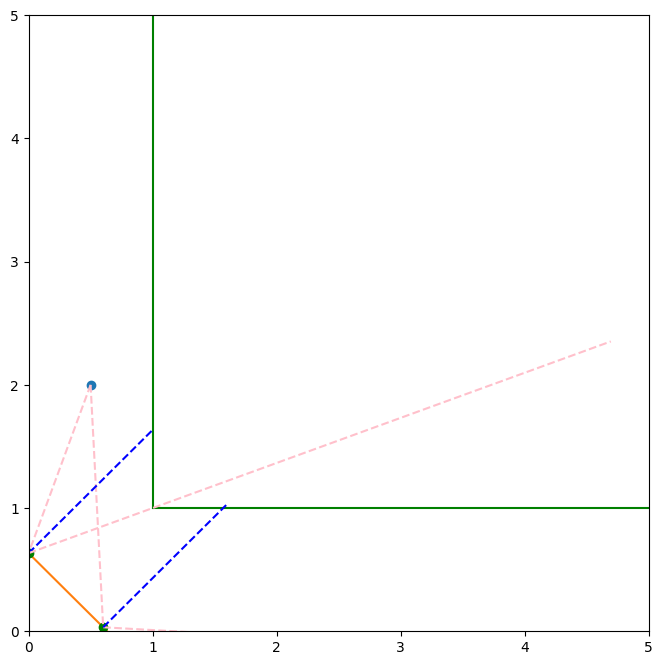

In [ ]:
L = (3 - np.sqrt(3)) / np.sqrt(2)
theta = np.arctan((2-(L/np.sqrt(2)))/.5)
theta2= np.pi + float(result[0][2]) #np.pi/2 + .06
plot_scenario(L, theta, theta2=theta2)
print(L, theta)

Let $\rho$ be the angle at which $L$ slants.

\begin{align}
&\min_{\theta_1, \theta_2, \rho} L \\
\psi &= \pi - \theta - 2\rho \\
tan(\psi)&=−tan(\theta+2\rho) \\
y_1 &= (x_1 - \frac12)tan(\theta_1)+2 \\
y_2 &= (x_2 - \frac12)tan(\theta_2)+2 \\
y &= x*tan(-\rho) + L*sin(\rho) \\
y_1 &= \tan(\psi_1)(x_1-1) + 1 \\
y_2 &= \tan(\psi_2)(x_2-1) \\
0 &\leq x \leq L*cos(rho) \\
0 &\leq y \leq L*sin(rho) \\
\frac12 &< L*cos(\theta_2)
\end{align}


0.8965754721680536 1.2435581798516304


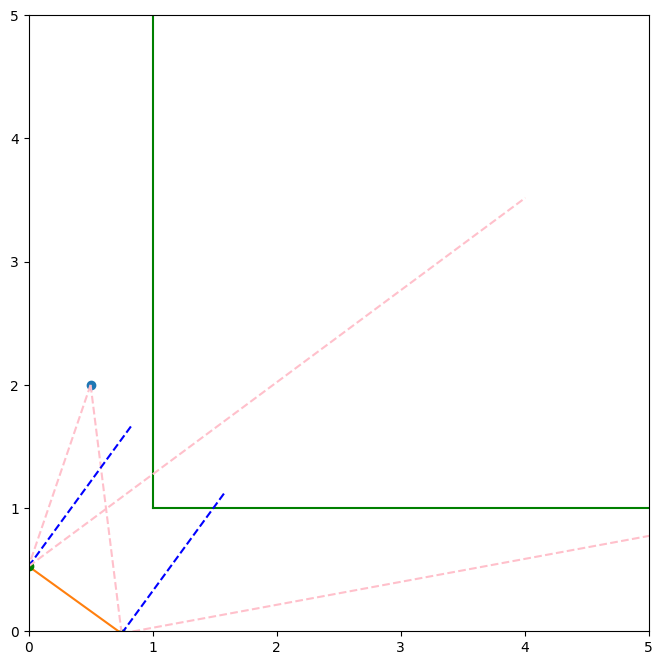

In [ ]:
L = (3 - np.sqrt(3)) / np.sqrt(2)
rho = np.pi/5
theta = np.arctan((2-(L*np.sin(rho)))/.5)
theta2 = np.pi/2 + .13
plot_scenario(L, theta, rho, theta2=theta2)
print(L, theta)

0.6339745962155614 1.2508752220694663


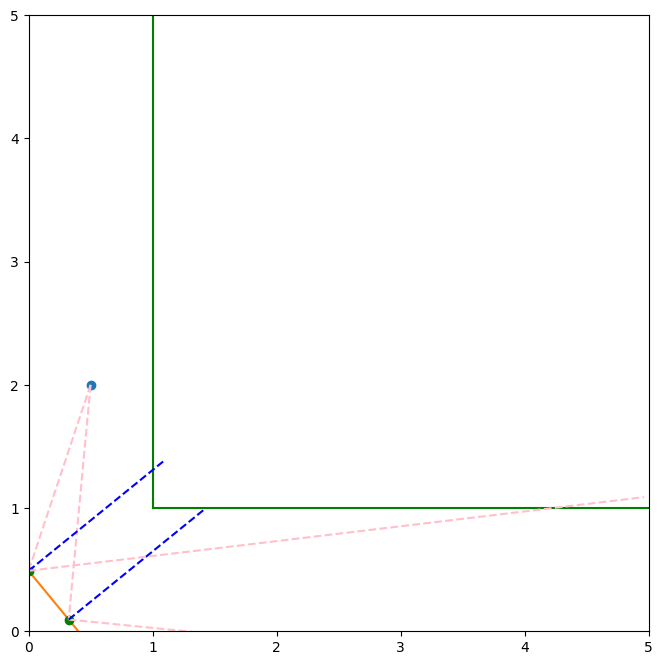

In [ ]:
L = (3 - np.sqrt(3)) / 2
rho = np.pi/4 + .1
theta = np.arctan((2-(L*np.sin(rho)))/.5)
theta2 = np.pi/2 - .1
plot_scenario(L, theta, rho, theta2=theta2)
print(L, theta)

0.5 1.2857141914827697 0.6283185307179586


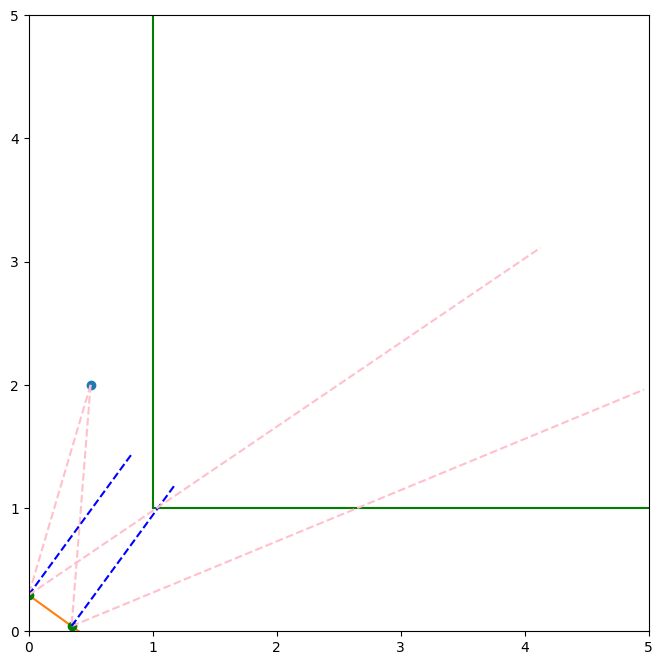

In [ ]:
L = .5
rho = np.pi/5
theta = np.arctan((2-(L*np.sin(rho)))/.5)
theta2 = np.pi/2 -.08
plot_scenario(L, theta, rho, theta2)
print(L, theta, rho)

0.25 1.3101939350475555 0.5235987755982988


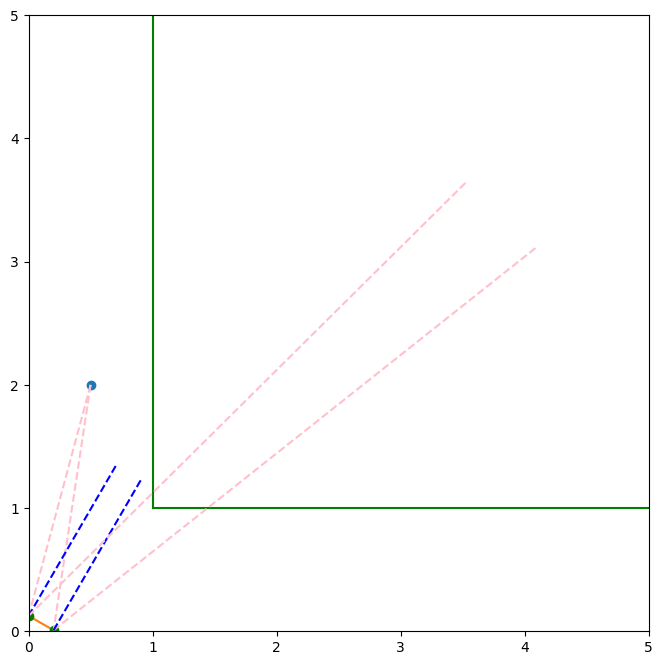

In [ ]:
L = .25
rho = np.pi/6
theta = np.arctan((2-(L*np.sin(rho)))/.5)
theta2 = np.pi/2 -.15
plot_scenario(L, theta, rho, theta2)
print(L, theta, rho)

0.6339745962155614 1.270393489157041 0.6544984694978736


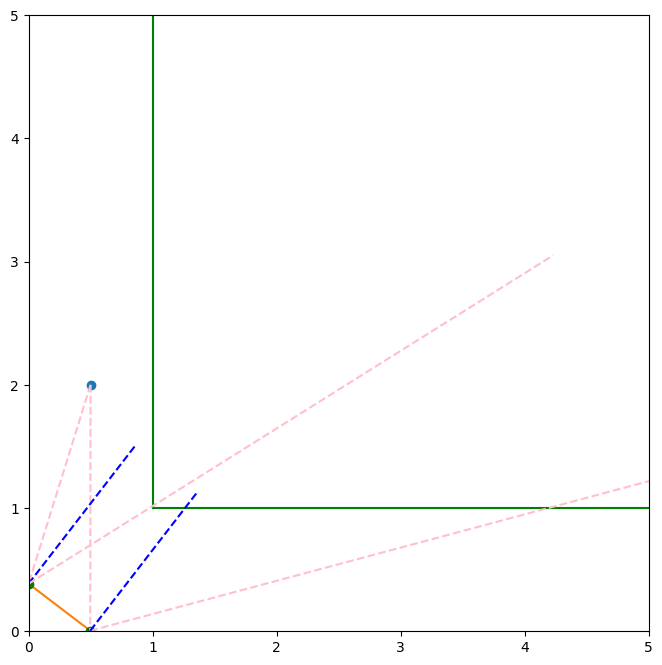

In [ ]:
L = (3 - np.sqrt(3)) / 2
rho = 1.25*np.pi/6
theta = np.arctan((2-(L*np.sin(rho)))/.5)
theta2= np.arctan(-2 / (.5 - L*np.cos(rho)))
fig, ax = plot_scenario(L, theta, rho, theta2)
# plot_line(ax, .5, L*np.cos(rho), 2, 0)

# psi = mirror_angle(theta2, rho=rho)
# plot_angle(ax, psi, L*np.cos(rho), 0, magnitude=5)
# plot_angle(ax, (np.pi/2) - rho , L*np.cos(rho), 0, color='blue', magnitude=np.sqrt(2))
print(L, theta, rho)

In [ ]:
# Create a widget for plot_scenario(L, theta, rho, theta2)
import ipywidgets as widgets
from IPython.display import display

L = (3-np.sqrt(3))/np.sqrt(2)
# Create sliders for the parameters
L_slider = widgets.FloatSlider(value=L, min=0.1, max=np.sqrt(2), step=0.1, description='L:')
theta_slider = widgets.FloatSlider(value=np.arctan((2-(L/np.sqrt(2)))/.5), min=0, max=np.pi, step=0.1, description='theta:')
rho_slider = widgets.FloatSlider(value=np.pi/4, min=0, max=np.pi/2, step=0.1, description='rho:')
theta2_slider = widgets.FloatSlider(value=np.pi + float(result[0][2]), min=0, max=np.pi, step=0.1, description='theta2:')

# Create an interactive plot
widgets.interact(plot_scenario,
                l=L_slider,
                theta=theta_slider,
                rho=rho_slider,
                theta2=theta2_slider);

interactive(children=(FloatSlider(value=0.8965754721680536, description='L:', max=1.4142135623730951, min=0.1)…

Let $\rho$ be the angle at which $L$ slants.

\begin{align}
\psi &= \pi - \theta - 2\rho \\
tan(\psi)&=−tan(\theta+2\rho) \\
y_1 &= (x_1 - \frac12)tan(\theta_1)+2 \\
y_2 &= (x_2 - \frac12)tan(\theta_2)+2 \\
y &= x*tan(-\rho) + L*sin(\rho) \\
y_1 &= \tan(\psi_1)(x_1-1) + 1 \\
y_2 &= \tan(\psi_2)(x_2-1) \\
y_2 &= 0 \\
x_1 &= 0
\end{align}


In [ ]:
# Use sympy to solve system of equations

l, x2, y1, theta1, theta2, rho = sp.symbols('l x2 y1 theta1 theta2 rho')
eq1 = sp.Eq(y1, -.5*sp.tan(theta1)+ 2)
eq2 = sp.Eq(0, (x2 - .5)*sp.tan(theta2) + 2)
eq3 = sp.Eq(y1, l*sp.sin(rho))
eq4 = sp.Eq(0, x2*sp.tan(-rho) + l*sp.sin(rho))
eq5 = sp.Eq(y1, (-1)*sp.tan(np.pi - theta1 - 2*rho) + 1)
eq6 = sp.Eq(0, (x2-1)*sp.tan(np.pi - theta2 - 2*rho))
result2 = sp.solve([eq1, eq2, eq3, eq4, eq5, eq6], (l, x2, y1, theta1, theta2, rho))
result2

In [ ]:
from scipy.optimize import minimize

# Define the function to minimize
def objective(vars):
    theta1, theta2, rho, L = vars
    return L

# Define the constraints
def constraint1(vars):
    theta1, theta2, rho, L = vars
    psi = np.pi - theta1 - 2 * rho
    return np.tan(psi) + np.tan(theta1 + 2 * rho)

def constraint2(vars):
    theta1, theta2, rho, L = vars
    # Example for y1
    x1 = 0.5  # assuming a value for demonstration
    return y1 - ((x1 - 0.5) * np.tan(theta1) + 2)

def constraint3(vars):
    theta1, theta2, rho, L = vars
    # Example for y2
    x2 = 0.5  # assuming a value for demonstration
    return y2 - ((x2 - 0.5) * np.tan(theta2) + 2)

def constraint4(vars):
    theta1, theta2, rho, L = vars
    # Example for y
    x = 0.5  # assuming a value for demonstration
    y = x * np.tan(-rho) + L * np.sin(rho)
    return y

# Initial guess
initial_guess = [0.1, 0.1, 0.1, 1]

# Constraints definition
constraints = [
    {'type': 'eq', 'fun': constraint1},
    {'type': 'eq', 'fun': constraint2},
    {'type': 'eq', 'fun': constraint3},
    {'type': 'eq', 'fun': constraint4}
]

# Perform the optimization
result = minimize(objective, initial_guess, constraints=constraints)

# Output the result
print(result)

NameError: name 'y1' is not defined